In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [5]:
df=pd.read_excel("Scintillator table 1.xlsx")
print(df)



   Channel  E(keV) Source
0      355     662  Cs137
1      686    1275   Na22
2      284     511   Na22
3      633    1170   Co60
4      717    1330   Co60
5      198     356  Ba133
6       68     122   Co57


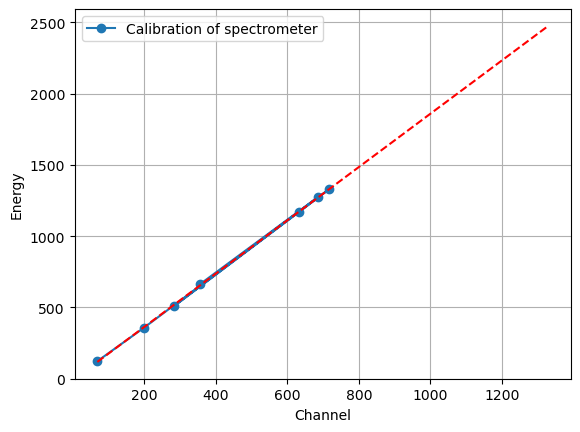

Slope: (1.8690973328686524, -10.14503643113413) 
Error in slope: 0.010638491161011171


In [6]:
plt.plot(df['Channel'],df['E(keV)'],ls='-',marker='o',label='Calibration of spectrometer')
plt.xlabel('Channel')
plt.ylabel('Energy')
plt.legend()
plt.grid()
def f(x,m,c):
    return m*x+c
coeffs,cov=curve_fit(f,df['Channel'],df['E(keV)'])
# Extract fitted parameters
m, c = coeffs

# Calculate the error (standard deviation) for the slope
slope_error = np.sqrt(cov[0, 0])

# Generate fitted line data
x_line = np.linspace(df['Channel'].min(), df['E(keV)'].max(), 100)
y_line = f(x_line, m, c)

# Plot the fitted line
plt.plot(x_line, y_line, color='red',ls='--')
plt.show()
print(f"Slope: {m,c} ")
print(f"Error in slope: {slope_error}")

<>:22: SyntaxWarning: invalid escape sequence '\,'
<>:22: SyntaxWarning: invalid escape sequence '\,'
/tmp/ipykernel_56784/4160179232.py:22: SyntaxWarning: invalid escape sequence '\,'
  plt.plot(x_line, y_line, linestyle='--', color='gray', label=f'Fit: $E = {m:.2f} \, \\times \, \\text{{Channel}} {c:.2f}$')


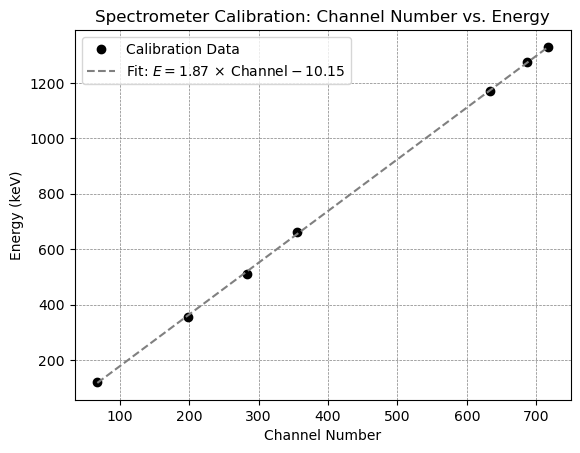

Slope: 1.87
Error in slope: 0.01


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the linear function for fitting
def linear_fit(x, m, c):
    return m * x + c

# Perform the curve fitting
coeffs, cov = curve_fit(linear_fit, df['Channel'], df['E(keV)'])
m, c = coeffs  # Slope and intercept
slope_error = np.sqrt(cov[0, 0])  # Error in the slope

# Generate data for the fitted line
x_line = np.linspace(df['Channel'].min(), df['Channel'].max(), 100)
y_line = linear_fit(x_line, m, c)

# Plot the original data points
plt.plot(df['Channel'], df['E(keV)'], 'o', color='black', label='Calibration Data')

# Plot the fitted line
plt.plot(x_line, y_line, linestyle='--', color='gray', label=f'Fit: $E = {m:.2f} \, \\times \, \\text{{Channel}} {c:.2f}$')

# Labels, legend, and title
plt.xlabel('Channel Number')
plt.ylabel('Energy (keV)')
plt.title('Spectrometer Calibration: Channel Number vs. Energy')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()

# Print the slope and its error
print(f"Slope: {m:.2f}")
print(f"Error in slope: {slope_error:.2f}")


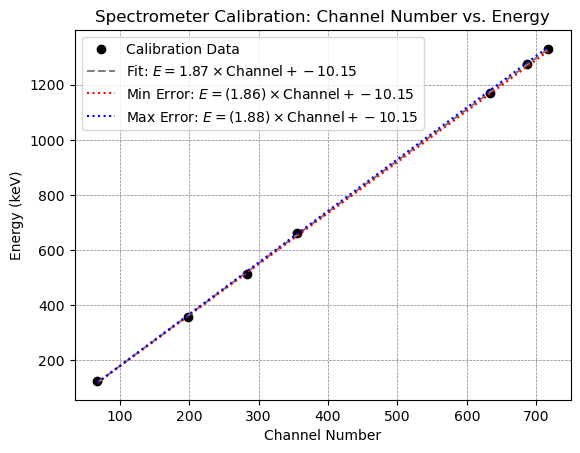

Slope: 1.87
Error in slope: 0.01


In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the linear function for fitting
def linear_fit(x, m, c):
    return m * x + c

# Perform the curve fitting
coeffs, cov = curve_fit(linear_fit, df['Channel'], df['E(keV)'])
m, c = coeffs  # Slope and intercept
slope_error = np.sqrt(cov[0, 0])  # Error in the slope

# Calculate the error bounds for the slope (min and max)
m_min = m - slope_error
m_max = m + slope_error

# Generate data for the fitted line and the error bounds
x_line = np.linspace(df['Channel'].min(), df['Channel'].max(), 100)
y_line = linear_fit(x_line, m, c)

# Compute the lines for the min and max slopes
y_line_min = linear_fit(x_line, m_min, c)
y_line_max = linear_fit(x_line, m_max, c)

# Plot the original data points
plt.plot(df['Channel'], df['E(keV)'], 'o', color='black', label='Calibration Data')

# Plot the fitted line
plt.plot(x_line, y_line, linestyle='--', color='gray', label=f'Fit: $E = {m:.2f} \\times \\text{{Channel}} + {c:.2f}$')

# Plot the error bounds (min and max lines)
plt.plot(x_line, y_line_min, linestyle=':', color='red', label=f'Min Error: $E = ({m_min:.2f}) \\times \\text{{Channel}} + {c:.2f}$')
plt.plot(x_line, y_line_max, linestyle=':', color='blue', label=f'Max Error: $E = ({m_max:.2f}) \\times \\text{{Channel}} + {c:.2f}$')

# Labels, legend, and title
plt.xlabel('Channel Number')
plt.ylabel('Energy (keV)')
plt.title('Spectrometer Calibration: Channel Number vs. Energy')
plt.legend()
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()

# Print the slope and its error
print(f"Slope: {m:.2f}")
print(f"Error in slope: {slope_error:.2f}")


In [8]:
data=pd.read_excel("Scintillator Table 2.xlsx")
data = data[:7]
print(data)



      No     N1     N2 Source         R1        Eo        E1        E2  \
0   68.0   63.0   74.0   Co57  16.176471   116.947   107.602   128.161   
1  197.0  186.0  209.0  Ba133  11.675127   358.048   337.489   380.476   
2  631.0  611.0  652.0   Co60   6.497623  1169.194  1131.814  1208.443   
3  717.0  694.0  738.0   Co60   6.136681  1329.928  1286.941  1369.177   
4  284.0  270.0  297.0   Na22   9.507042   520.651   494.485   544.948   
5  686.0  664.0  706.0   Na22   6.122449  1271.989  1230.871  1309.369   
6  354.0  341.0  368.0  Cs137   7.627119   651.481   627.184   677.647   

          R2         R         E  
0  17.579758  0.175798  0.092471  
1  12.005932  0.120059  0.052848  
2   6.554002  0.065540  0.029245  
3   6.183493  0.061835  0.027421  
4   9.692289  0.096923  0.043825  
5   6.171280  0.061713  0.028039  
6   7.745890  0.077459  0.039179  


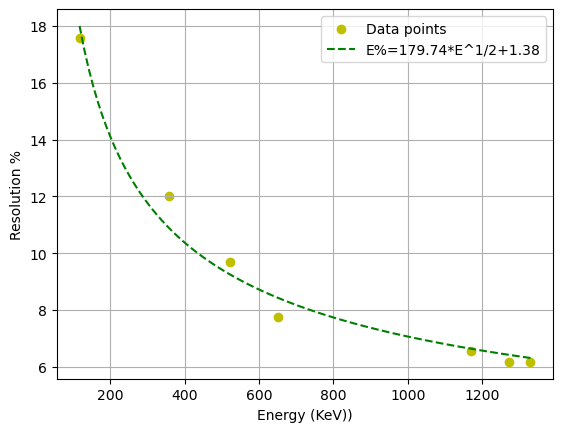

Slope: (179.74077397873515, 1.3812392502682311) 
Error in slope: 11.676786360977609


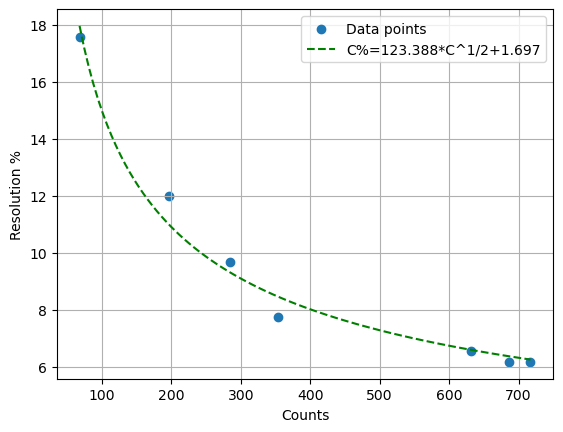

Slope: (139.42468170821442, 1.046724500579057) 
Error in slope: 8.409714569418062


In [9]:
plt.scatter(data['Eo'].values,data['R2'].values,marker='o',label='Data points',color='y')
plt.xlabel('Energy (KeV))')
plt.ylabel('Resolution %')
plt.legend()
plt.grid()
def f(E,a,c):
    return a*E**(-1/2)+c
coeffs,cov=curve_fit(f,data['Eo'].values,data['R2'].values)
# Extract fitted parameters
a, c = coeffs

# Calculate the error (standard deviation) for the slope
slope_error = np.sqrt(cov[0, 0])

# Generate fitted line data
x_line = np.linspace(data['Eo'].values.min(), data['Eo'].values.max(), 100)
y_line = f(x_line, a, c)

# Plot the fitted line
plt.plot(x_line, y_line, color='g',ls='--',label='E%=179.74*E^1/2+1.38')
plt.legend()
plt.show()
print(f"Slope: {a,c} ")
print(f"Error in slope: {slope_error}")

plt.scatter(data['No'],data['R2'],marker='o',label='Data points')
plt.xlabel('Counts')
plt.ylabel('Resolution %')
plt.legend()
plt.grid()
def f(E,a,c):
    return a*E**(-1/2)+c
coeffs,cov=curve_fit(f,data['No'].values,data['R2'].values)
# Extract fitted parameters
a, c = coeffs

# Calculate the error (standard deviation) for the slope
slope_error = np.sqrt(cov[0, 0])

# Generate fitted line data
x_line = np.linspace(data['No'].min(), data['No'].max(), 100)
y_line = f(x_line, a, c)

# Plot the fitted line
plt.plot(x_line, y_line, color='g',ls='--',label='C%=123.388*C^1/2+1.697')
plt.legend()
plt.show()
print(f"Slope: {a,c} ")
print(f"Error in slope: {slope_error}")

<>:22: SyntaxWarning: invalid escape sequence '\c'
<>:51: SyntaxWarning: invalid escape sequence '\c'
<>:22: SyntaxWarning: invalid escape sequence '\c'
<>:51: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_56784/4134341125.py:22: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(x_line, y_line, color='gray', linestyle='--', label=f'Fit: $R = {a:.2f} \cdot E^{{-1/2}} + {c:.2f}$')
/tmp/ipykernel_56784/4134341125.py:51: SyntaxWarning: invalid escape sequence '\c'
  plt.plot(x_line, y_line, color='gray', linestyle='--', label=f'Fit: $R = {a:.2f} \cdot N^{{-1/2}} + {c:.2f}$')


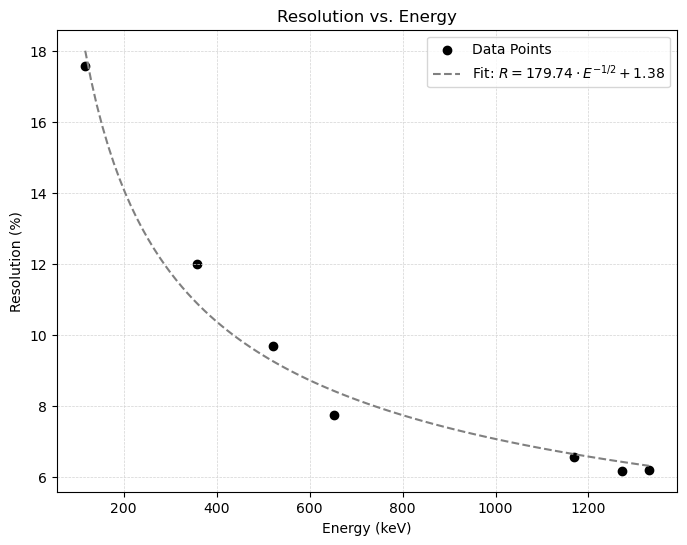

Slope (a): 179.74
Error in slope (a): 11.68


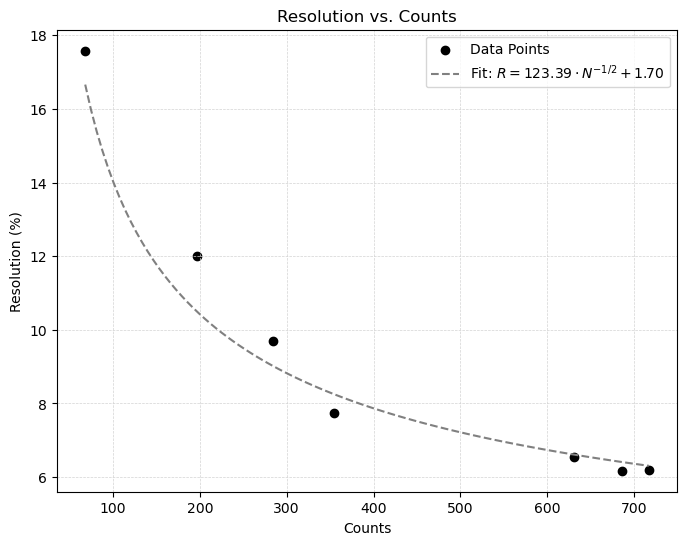

Slope (a): 123.39
Error in slope (a): 9.49


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the fitting function
def resolution_fit(E, a, c):
    return a * E**(-1/2) + c

# First Plot: Energy vs. Resolution %
# Perform the curve fitting
coeffs, cov = curve_fit(resolution_fit, data['Eo'].values, data['R2'].values)
a, c = coeffs  # Fitted parameters
slope_error = np.sqrt(cov[0, 0])  # Error in 'a'

# Generate data for the fitted curve
x_line = np.linspace(data['Eo'].values.min(), data['Eo'].values.max(), 100)
y_line = resolution_fit(x_line, a, c)

# Plot the data points and fitted curve
plt.figure(figsize=(8, 6))
plt.scatter(data['Eo'].values, data['R2'].values, marker='o', color='black', label='Data Points')
plt.plot(x_line, y_line, color='gray', linestyle='--', label=f'Fit: $R = {a:.2f} \cdot E^{{-1/2}} + {c:.2f}$')

# Labels, legend, and title
plt.xlabel('Energy (keV)')
plt.ylabel('Resolution (%)')
plt.title('Resolution vs. Energy')
plt.legend()
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()

# Print the slope and its error
print(f"Slope (a): {a:.2f}")
print(f"Error in slope (a): {slope_error:.2f}")

# Second Plot: Counts vs. Resolution %
# Perform the curve fitting
coeffs, cov = curve_fit(resolution_fit, data['No'].values, data['R1'].values)
a, c = coeffs  # Fitted parameters
slope_error = np.sqrt(cov[0, 0])  # Error in 'a'

# Generate data for the fitted curve
x_line = np.linspace(data['No'].values.min(), data['No'].values.max(), 100)
y_line = resolution_fit(x_line, a, c)

# Plot the data points and fitted curve
plt.figure(figsize=(8, 6))
plt.scatter(data['No'].values, data['R2'].values, marker='o', color='black', label='Data Points')
plt.plot(x_line, y_line, color='gray', linestyle='--', label=f'Fit: $R = {a:.2f} \cdot N^{{-1/2}} + {c:.2f}$')

# Labels, legend, and title
plt.xlabel('Counts')
plt.ylabel('Resolution (%)')
plt.title('Resolution vs. Counts')
plt.legend()
plt.grid(color='lightgray', linestyle='--', linewidth=0.5)

# Show the plot
plt.show()

# Print the slope and its error
print(f"Slope (a): {a:.2f}")
print(f"Error in slope (a): {slope_error:.2f}")


In [11]:
dat=pd.read_excel("./ava/ba133_50.xlsx")
print(dat)
dt=pd.read_excel("./ava/BG_50s.xlsx")
print(dt)
file=pd.read_excel("./ava/na22_50.xlsx")
print(file)

      Channel  Counts         E  Energy  BGCounts  Background subtracted
0           0       0   -10.145 -10.145         0                      0
1           1       0    -8.276 -10.145         0                      0
2           2       0    -6.407 -10.145         0                      0
3           3       0    -4.538 -10.145         0                      0
4           4       0    -2.669 -10.145         0                      0
...       ...     ...       ...     ...       ...                    ...
1019     1019       0  1894.366 -10.145         0                      0
1020     1020       1  1896.235  -8.276         0                      1
1021     1021       0  1898.104 -10.145         0                      0
1022     1022       0  1899.973 -10.145         0                      0
1023     1023       0  1901.842 -10.145         0                      0

[1024 rows x 6 columns]
      Channel  Counts    Energy
0           0       0   -10.145
1           1       0    -8.276
2  

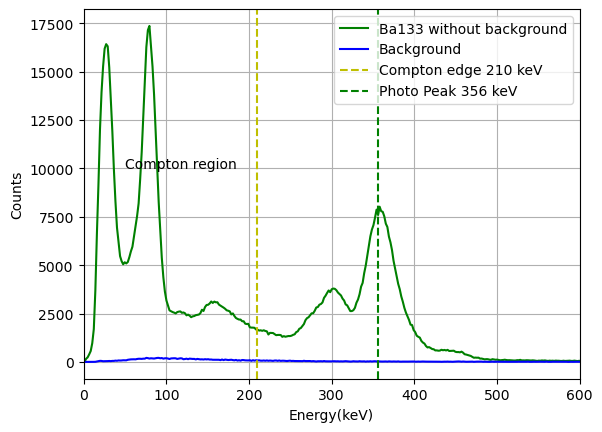

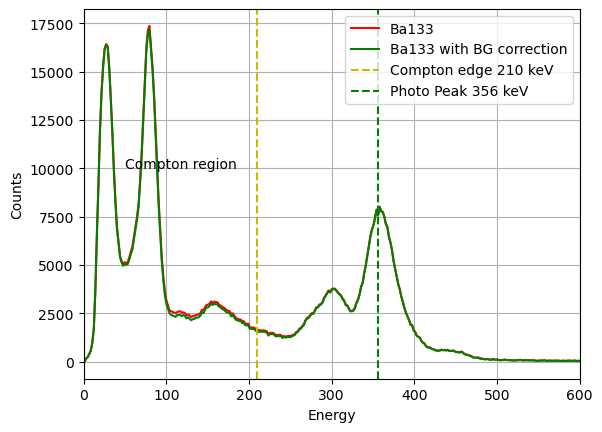

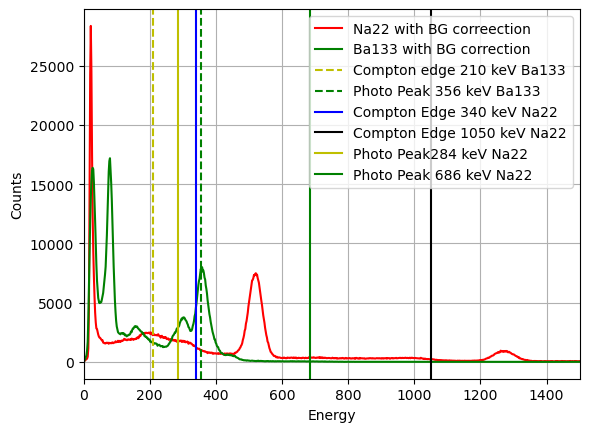

In [12]:
fig=plt.figure()
ax=fig.add_subplot()
ax.text(50,10000,'Compton region')
plt.plot(dat['E'],dat['Counts'],ls='-',label='Ba133 without background',color='g')
plt.plot(dt['Energy'],dt['Counts'],ls='-',label='Background',color='b')
plt.axvline(x=210, color='y', linestyle='--',label='Compton edge 210 keV')
plt.axvline(x=356, color='g', linestyle='--',label='Photo Peak 356 keV')
plt.xlim(0,600)
plt.xlabel('Energy(keV)')
plt.ylabel('Counts')
plt.legend()
plt.grid()
plt.show()

fig=plt.figure()
ax=fig.add_subplot()
ax.text(50,10000,'Compton region')
plt.plot(dat['E'],dat['Counts'],ls='-',label='Ba133',color='r')
plt.plot(dat['E'],dat['Background subtracted'],ls='-',label='Ba133 with BG correction',color='g')
plt.axvline(x=210, color='y', linestyle='--',label='Compton edge 210 keV')
plt.axvline(x=356, color='g', linestyle='--',label='Photo Peak 356 keV')
plt.xlim(0,600)
plt.xlabel('Energy')
plt.ylabel('Counts')
plt.legend()
plt.grid()
plt.show()

plt.plot(file['Energys'],file['BG Corrected'],ls='-',label='Na22 with BG correection',color='r')
plt.plot(dat['E'],dat['Background subtracted'],ls='-',label='Ba133 with BG correction',color='g')
plt.axvline(x=210, color='y', linestyle='--',label='Compton edge 210 keV Ba133')
plt.axvline(x=356, color='g', linestyle='--',label='Photo Peak 356 keV Ba133')
plt.axvline(x=340, color='b', linestyle='-',label='Compton Edge 340 keV Na22')
plt.axvline(x=1050, color='black', linestyle='-',label='Compton Edge 1050 keV Na22')
plt.axvline(x=284, color='y', linestyle='-',label='Photo Peak284 keV Na22')
plt.axvline(x=686, color='g', linestyle='-',label='Photo Peak 686 keV Na22')
plt.xlim(0,1500)
plt.xlabel('Energy')
plt.ylabel('Counts')
plt.legend()
plt.grid()
plt.show()

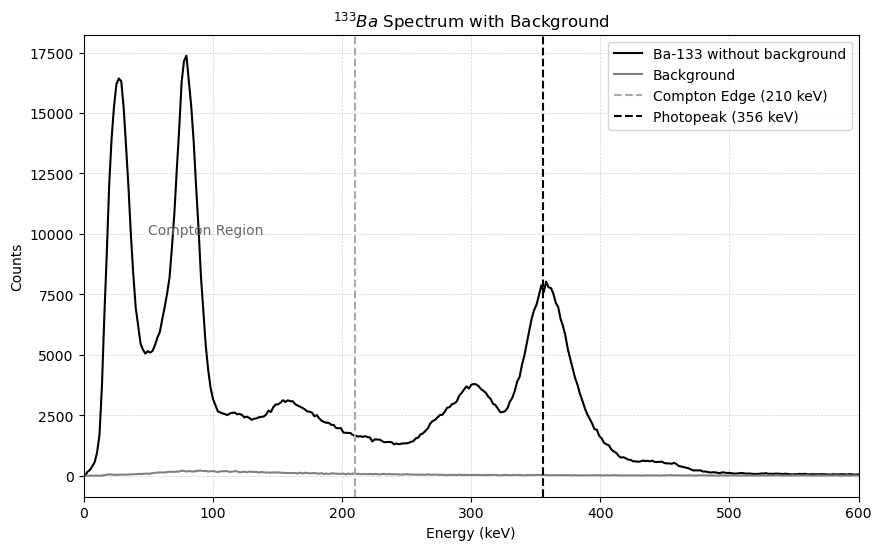

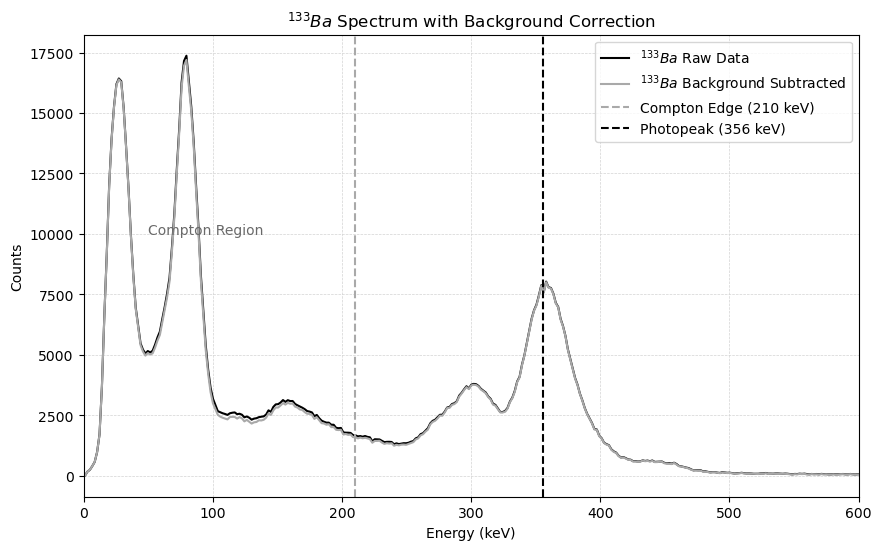

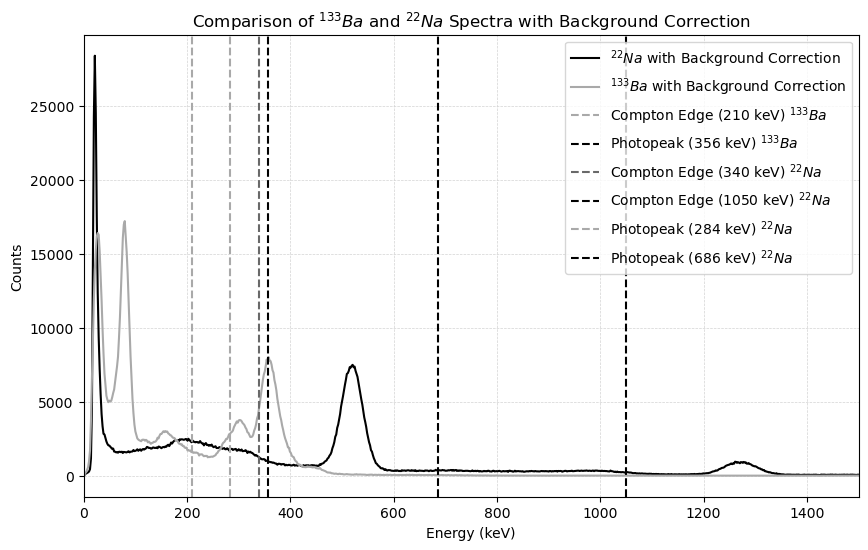

In [18]:
import matplotlib.pyplot as plt

# Plot 1: Ba-133 with Background and Compton Region Identification
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(dat['E'], dat['Counts'], linestyle='-', color='black', label='Ba-133 without background')
ax.plot(dt['Energy'], dt['Counts'], linestyle='-', color='gray', label='Background')
ax.axvline(x=210, color='darkgray', linestyle='--', label='Compton Edge (210 keV)')
ax.axvline(x=356, color='black', linestyle='--', label='Photopeak (356 keV)')
ax.text(50, 10000, 'Compton Region', fontsize=10, color='dimgray')
ax.set_xlim(0, 600)
ax.set_xlabel('Energy (keV)')
ax.set_ylabel('Counts')
ax.set_title(r'$^{133}Ba$ Spectrum with Background')
ax.legend()
ax.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.show()

# Plot 2: Ba-133 with Background Correction
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(dat['E'], dat['Counts'], linestyle='-', color='black', label=r'$^{133}Ba$ Raw Data')
ax.plot(dat['E'], dat['Background subtracted'], linestyle='-', color='darkgray', label=r'$^{133}Ba$ Background Subtracted')
ax.axvline(x=210, color='darkgray', linestyle='--', label='Compton Edge (210 keV)')
ax.axvline(x=356, color='black', linestyle='--', label='Photopeak (356 keV)')
ax.text(50, 10000, 'Compton Region', fontsize=10, color='dimgray')
ax.set_xlim(0, 600)
ax.set_xlabel('Energy (keV)')
ax.set_ylabel('Counts')
ax.set_title(r'$^{133}Ba$ Spectrum with Background Correction')
ax.legend()
ax.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.show()

# Plot 3: Combined Spectrum of Ba-133 and Na-22 with Background Correction
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(file['Energys'], file['BG Corrected'], linestyle='-', color='black', label=r'$^{22}Na$ with Background Correction')
ax.plot(dat['E'], dat['Background subtracted'], linestyle='-', color='darkgray', label=r'$^{133}Ba$ with Background Correction')
ax.axvline(x=210, color='darkgray', linestyle='--', label=r'Compton Edge (210 keV) $^{133}Ba$')
ax.axvline(x=356, color='black', linestyle='--', label=r'Photopeak (356 keV) $^{133}Ba$')
ax.axvline(x=340, color='dimgray', linestyle='--', label=r'Compton Edge (340 keV) $^{22}Na$')
ax.axvline(x=1050, color='black', linestyle='--', label=r'Compton Edge (1050 keV) $^{22}Na$')
ax.axvline(x=284, color='darkgray', linestyle='--', label=r'Photopeak (284 keV) $^{22}Na$')
ax.axvline(x=686, color='black', linestyle='--', label=r'Photopeak (686 keV) $^{22}Na$')
ax.set_xlim(0, 1500)
ax.set_xlabel('Energy (keV)')
ax.set_ylabel('Counts')
ax.set_title(r'Comparison of $^{133}Ba$ and $^{22}Na$ Spectra with Background Correction')
ax.legend()
ax.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.show()


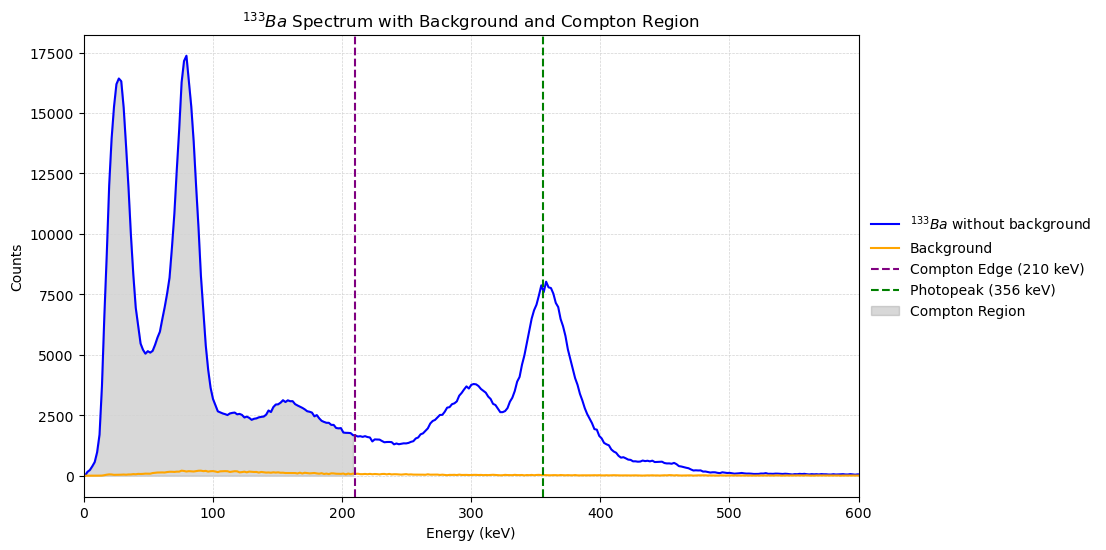

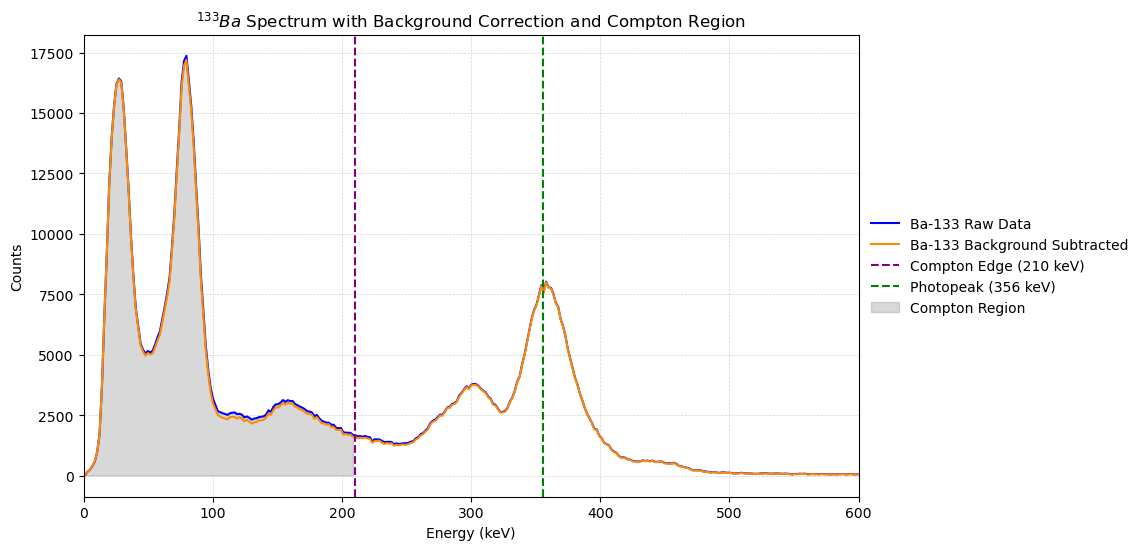

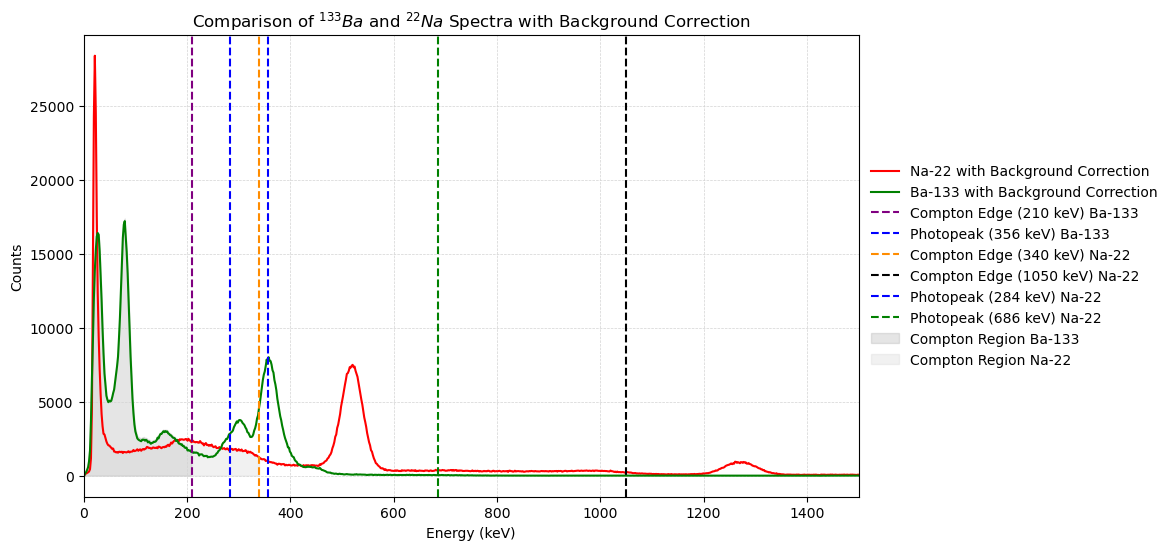

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Define energy regions for shading
compton_start = 0   # start of the Compton region in keV
compton_end = 210    # end of the Compton region (approx Compton edge) in keV

# Plot 1: Ba-133 Spectrum with Background and Compton Region Shading
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(dat['E'], dat['Counts'], linestyle='-', color='blue', label=r'$^{133}Ba$ without background')
ax.plot(dt['Energy'], dt['Counts'], linestyle='-', color='orange', label='Background')
ax.axvline(x=210, color='purple', linestyle='--', label='Compton Edge (210 keV)')
ax.axvline(x=356, color='green', linestyle='--', label='Photopeak (356 keV)')

# Shade the Compton region
ax.fill_between(dat['E'], 0, dat['Counts'], where=(dat['E'] >= compton_start) & (dat['E'] <= compton_end), 
                color='gray', alpha=0.3, label='Compton Region')

# Labels and title
ax.set_xlim(0, 600)
ax.set_xlabel('Energy (keV)')
ax.set_ylabel('Counts')
ax.set_title(r'$^{133}Ba$ Spectrum with Background and Compton Region')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
ax.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.show()

# Plot 2: Ba-133 Spectrum with Background Correction and Shaded Compton Region
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(dat['E'], dat['Counts'], linestyle='-', color='blue', label='Ba-133 Raw Data')
ax.plot(dat['E'], dat['Background subtracted'], linestyle='-', color='darkorange', label='Ba-133 Background Subtracted')
ax.axvline(x=210, color='purple', linestyle='--', label='Compton Edge (210 keV)')
ax.axvline(x=356, color='green', linestyle='--', label='Photopeak (356 keV)')

# Shade the Compton region
ax.fill_between(dat['E'], 0, dat['Counts'], where=(dat['E'] >= compton_start) & (dat['E'] <= compton_end), 
                color='gray', alpha=0.3, label='Compton Region')

# Labels and title
ax.set_xlim(0, 600)
ax.set_xlabel('Energy (keV)')
ax.set_ylabel('Counts')
ax.set_title(r'$^{133}Ba$ Spectrum with Background Correction and Compton Region')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
ax.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.show()

# Plot 3: Combined Spectrum of Ba-133 and Na-22 with Background Correction and Shaded Regions
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(file['Energys'], file['BG Corrected'], linestyle='-', color='red', label='Na-22 with Background Correction')
ax.plot(dat['E'], dat['Background subtracted'], linestyle='-', color='green', label='Ba-133 with Background Correction')
ax.axvline(x=210, color='purple', linestyle='--', label='Compton Edge (210 keV) Ba-133')
ax.axvline(x=356, color='blue', linestyle='--', label='Photopeak (356 keV) Ba-133')
ax.axvline(x=340, color='darkorange', linestyle='--', label='Compton Edge (340 keV) Na-22')
ax.axvline(x=1050, color='black', linestyle='--', label='Compton Edge (1050 keV) Na-22')
ax.axvline(x=284, color='blue', linestyle='--', label='Photopeak (284 keV) Na-22')
ax.axvline(x=686, color='green', linestyle='--', label='Photopeak (686 keV) Na-22')

# Shade Compton regions for Na-22 and Ba-133
ax.fill_between(dat['E'], 0, dat['Counts'], where=(dat['E'] >= compton_start) & (dat['E'] <= compton_end), 
                color='gray', alpha=0.2, label='Compton Region Ba-133')
ax.fill_between(file['Energys'], 0, file['BG Corrected'], where=(file['Energys'] >= 0) & (file['Energys'] <= 340), 
                color='lightgray', alpha=0.3, label='Compton Region Na-22')

# Labels and title
ax.set_xlim(0, 1500)
ax.set_xlabel('Energy (keV)')
ax.set_ylabel('Counts')
ax.set_title(r'Comparison of $^{133}Ba$ and $^{22}Na$ Spectra with Background Correction')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False)
ax.grid(color='lightgray', linestyle='--', linewidth=0.5)
plt.show()


In [16]:
datafile=pd.read_excel("Scintillator Table 3.xlsx")
print(datafile)

   Distance (cm)  Counts  Counts under peak  Count Integral        Ep  \
0              2    8023             198176          979337  0.202357   
1              4    5024             116379          622653  0.186908   
2              6    3652              69117          379403  0.182173   
3              8    1898              44924          253355  0.177316   
4             10    1892              41427          235113  0.176200   

           D         W          Ep*W  
0   2.000156  0.000039  7.903656e-06  
1   4.000078  0.000010  1.825223e-06  
2   6.000052  0.000004  7.906713e-07  
3   8.000039  0.000002  4.328982e-07  
4  10.000031  0.000002  2.753118e-07  


Slope: (14729.917383003229, -0.8459352609453805) 
Error in slope: 1727.1168371780757


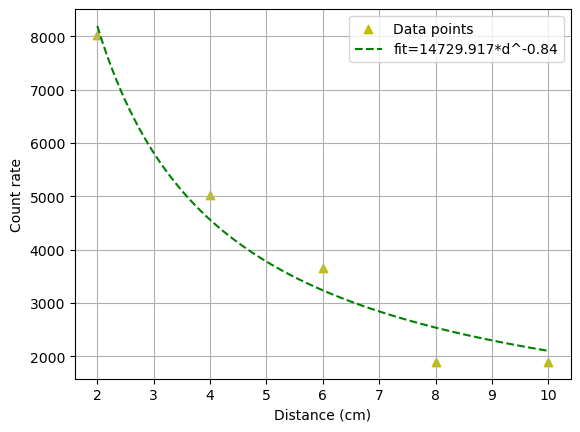

In [17]:
plt.scatter(datafile['Distance (cm)'],datafile['Counts'],marker='^',color='y',label='Data points')
plt.xlabel('Distance (cm)')
plt.ylabel('Count rate')
plt.legend()
plt.grid()
def f(d,a,b):
    return a*d**b
coeffs,cov=curve_fit(f,datafile['Distance (cm)'].values,datafile['Counts'].values)
# Extract fitted parameters
a, b = coeffs

# Calculate the error (standard deviation) for the slope
slope_error = np.sqrt(cov[0, 0])

# Generate fitted line data
x_line = np.linspace(datafile['Distance (cm)'].values.min(), datafile['Distance (cm)'].values.max(), 100)
y_line = f(x_line, a, b)

# Plot the fitted line
plt.plot(x_line, y_line, color='g',ls='--',label='fit=14729.917*d^-0.84')
plt.legend()
print(f"Slope: {a,b} ")
print(f"Error in slope: {slope_error}")
plt.show()

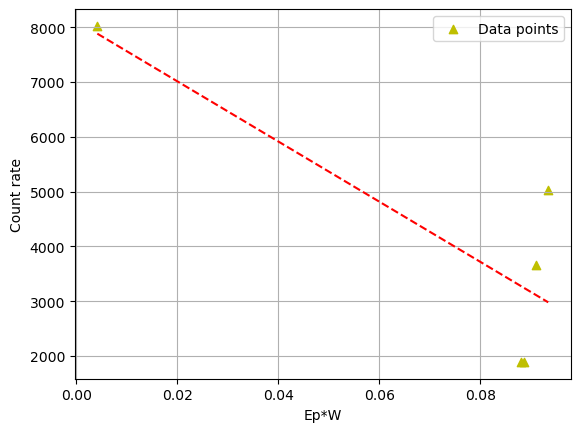

Slope: (-54915.64033827097, 8111.092454675931) 
Error in slope: 21446.181566176332


In [62]:
plt.scatter(datafile['Ep*W'],datafile['Counts'],marker='^',color='y',label='Data points')
plt.xlabel('Ep*W')
plt.ylabel('Count rate')
plt.legend()
plt.grid()
def f(x,m,c):
    return m*x+c
coeffs,cov=curve_fit(f,datafile['Ep*W'],datafile['Counts'])
# Extract fitted parameters
m, c = coeffs

# Calculate the error (standard deviation) for the slope
slope_error = np.sqrt(cov[0, 0])

# Generate fitted line data
x_line = np.linspace(datafile['Ep*W'].min(), datafile['Ep*W'].max(), 100)
y_line = f(x_line, m, c)

# Plot the fitted line
plt.plot(x_line, y_line, color='red',ls='--')
plt.show()
print(f"Slope: {m,c} ")
print(f"Error in slope: {slope_error}")